<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
breast_cancer = pd.read_csv('breast-cancer-wisconsin-data.csv', index_col='id')

### 2. EDA 

i. Explore dataset

ii. Check for nulls

In [4]:
# Head
breast_cancer.head().T

id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809


In [5]:
# Samples
breast_cancer.sample(5).T

id,90769602,8510426,90250,916221,89143602
diagnosis,B,B,B,B,B
radius_mean,12.72,13.54,12.05,11.34,14.41
texture_mean,17.67,14.36,22.72,18.61,19.73
perimeter_mean,80.98,87.46,78.75,72.76,96.03
area_mean,501.3,566.3,447.8,391.2,651
smoothness_mean,0.07896,0.09779,0.06935,0.1049,0.08757
compactness_mean,0.04522,0.08129,0.1073,0.08499,0.1676
concavity_mean,0.01402,0.06664,0.07943,0.04302,0.1362
concave points_mean,0.01835,0.04781,0.02978,0.02594,0.06602
symmetry_mean,0.1459,0.1885,0.1203,0.1927,0.1714


In [6]:
breast_cancer.shape

(569, 32)

In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [8]:
breast_cancer.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [9]:
# All values in 'Unnamed' are null. We'll drop them.
breast_cancer.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [10]:
breast_cancer['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [11]:
# diagnosis_map = {'B': 0, 'M': 1}

# breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(diagnosis_map)

In [12]:
# breast_cancer.sample(5).T

In [13]:
# Pair Plot
# sns.pairplot(breast_cancer)

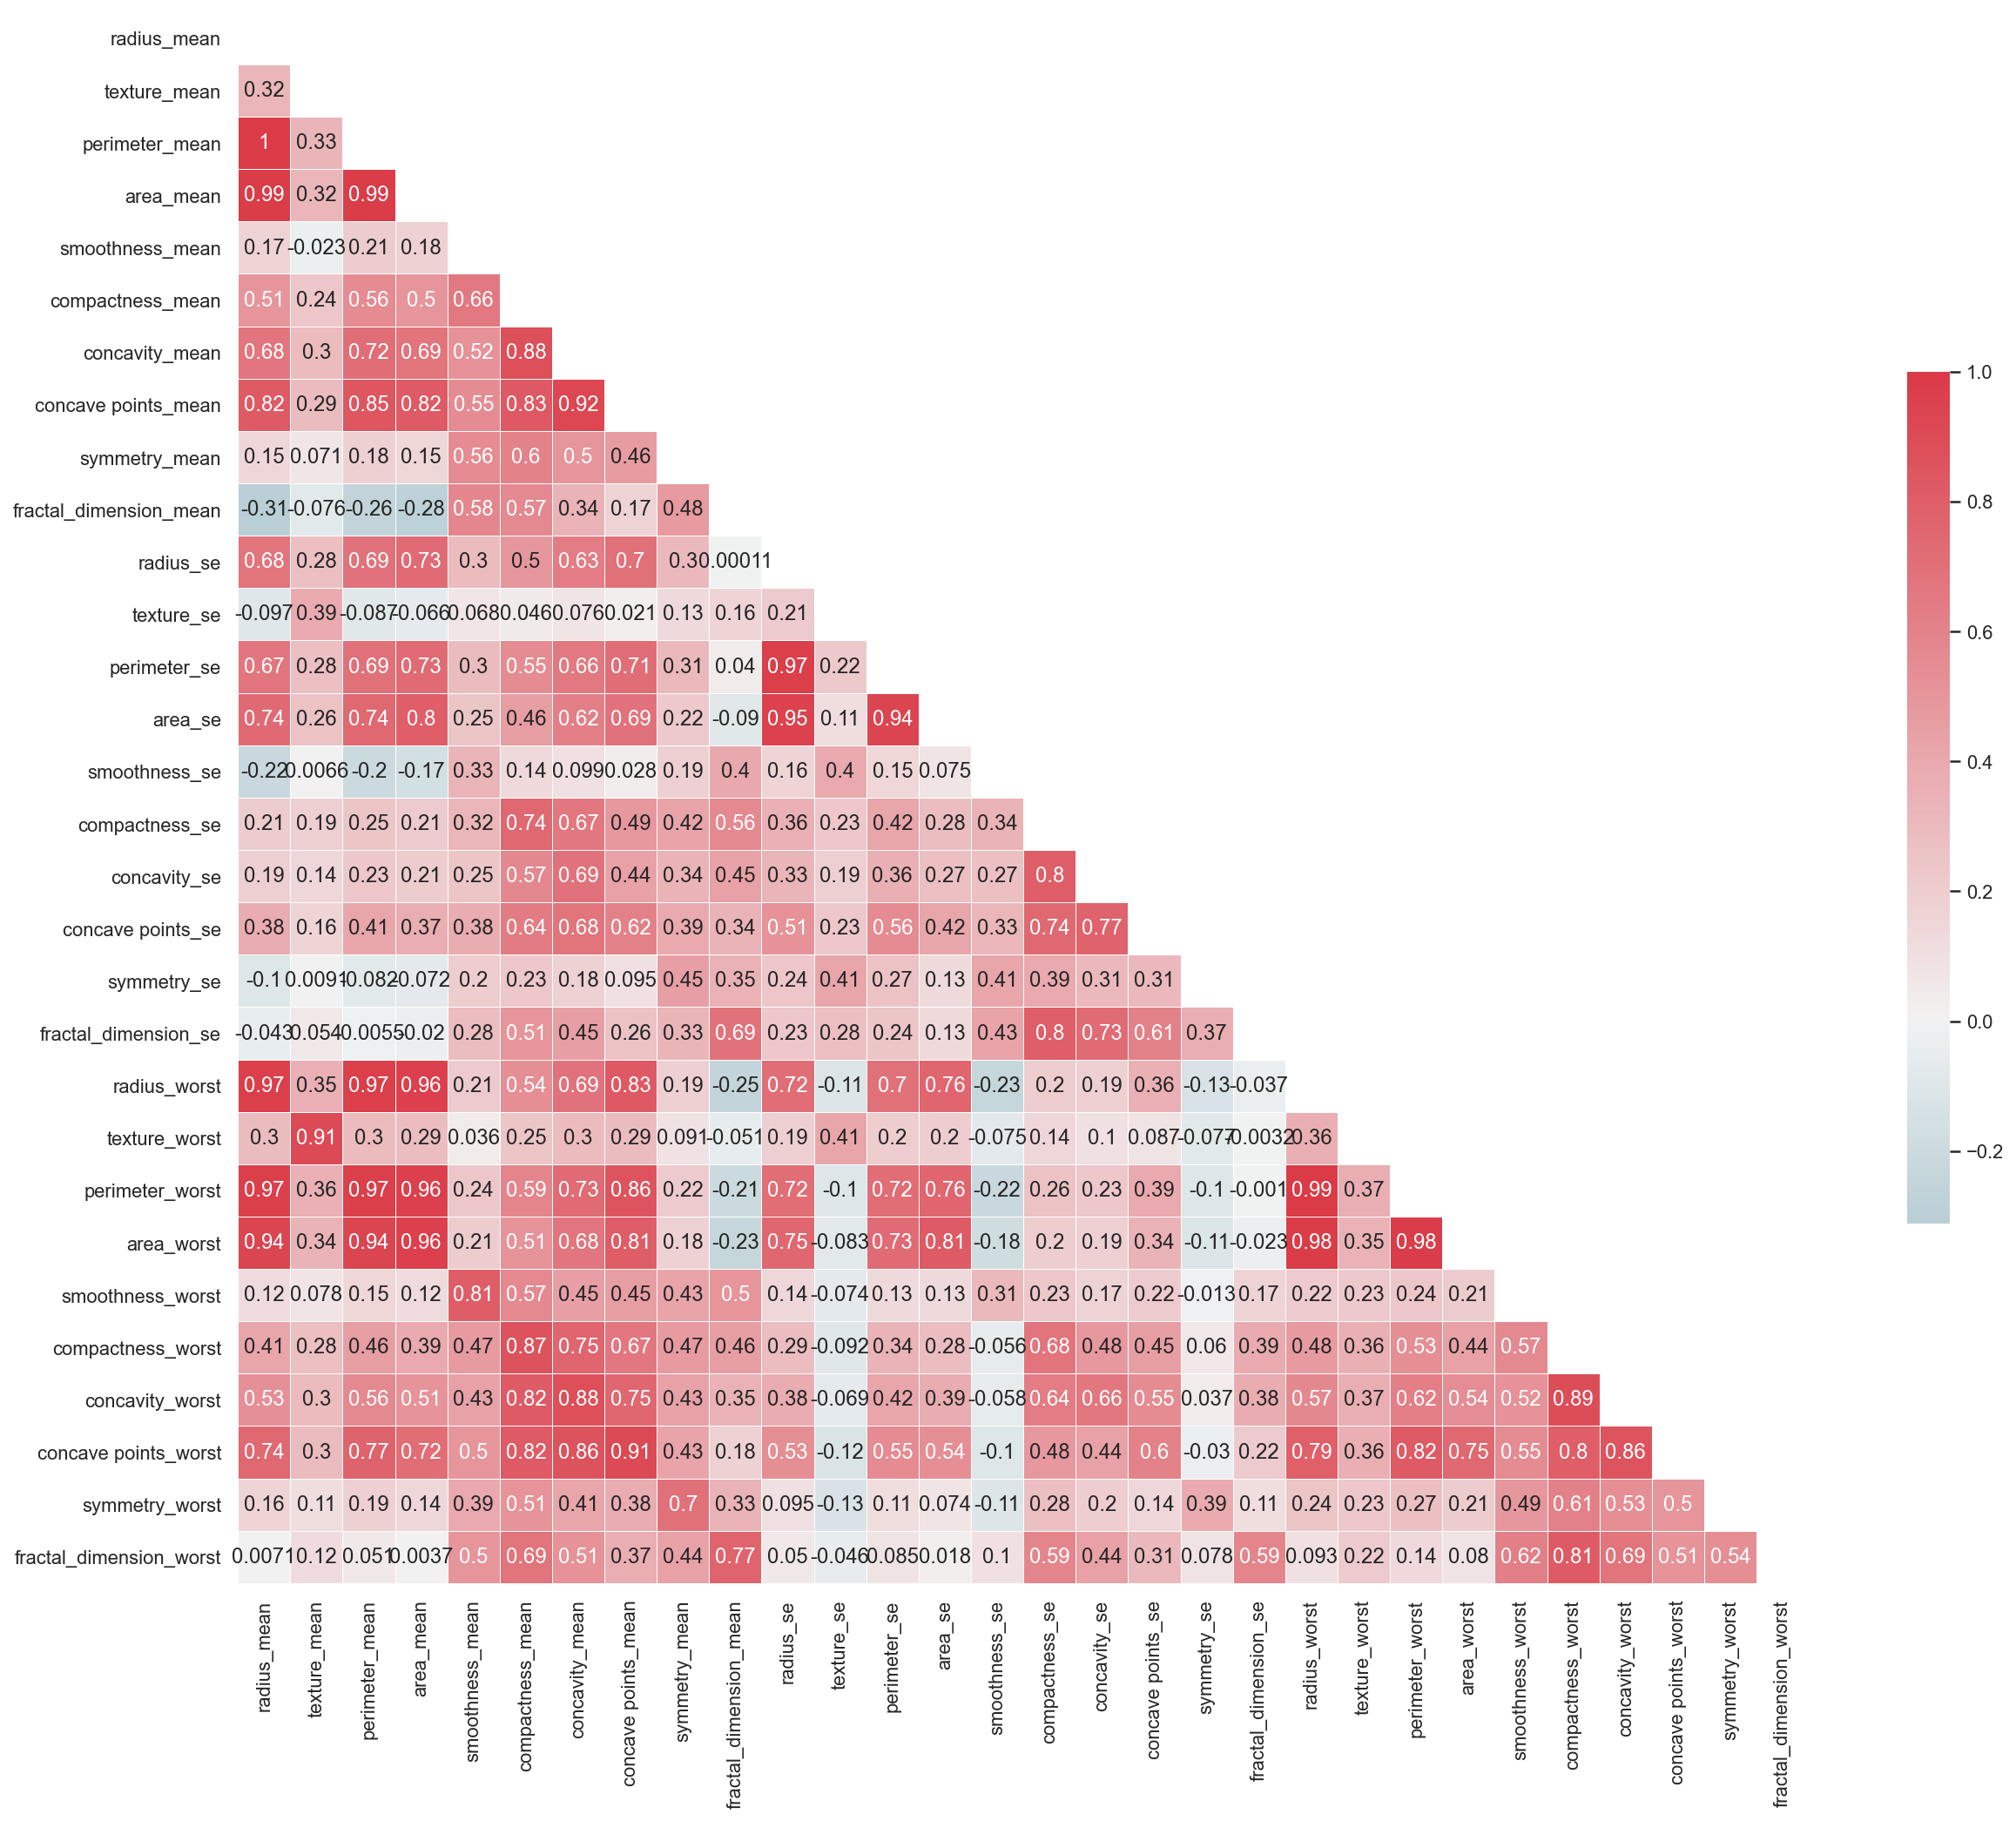

In [14]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(breast_cancer.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report (see sklearn classification_report) for that model.

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# If train_size is also None, test_size will be set to 0.25

lin_model = LogisticRegression(max_iter = 3000)
lin_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [16]:
y

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: diagnosis, Length: 569, dtype: object

#### 3.2 Calculate the predicted labels (class) and predicted probabilities on the test dataset.

In [17]:
# predicted labels (class):
y_pred = lin_model.predict(X_test)

# predicted probabilities:
y_pp = lin_model.predict_proba(X_test)

In [18]:
y_pred

array(['M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B'],
      dtype=object)

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

i. Create confusion_matrix

ii. Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [19]:
con_mat = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

In [20]:
print(con_mat)

[[50  5]
 [ 3 85]]


In [21]:
confusion = pd.DataFrame(con_mat, index=['predicted_cancer','predicted_healthy'],
                         columns=['is_malignant', 'is_benign'])
confusion

,is_malignant,is_benign
predicted_cancer,50,5
predicted_healthy,3,85


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [22]:
print('Accuracy score is : ', metrics.accuracy_score(y_test, y_pred))

Accuracy score is :  0.9440559440559441


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [23]:
print('Misclassification score is : ', 1 - metrics.accuracy_score(y_test, y_pred))

Misclassification score is :  0.05594405594405594


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [24]:
sensitivity = metrics.recall_score(y_test, y_pred, pos_label='M')
print('Sensitivity score is : ', sensitivity)

Sensitivity score is :  0.9090909090909091


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [25]:
TP = confusion_matrix(y_test, y_pred)[1, 1]
TN = confusion_matrix(y_test, y_pred)[0, 0]
FP = confusion_matrix(y_test, y_pred)[0, 1]
FN = confusion_matrix(y_test, y_pred)[1, 0]

specificity = TN / (TN + FP)
print('Specificity score is : ', specificity)

Specificity score is :  0.9659090909090909


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [26]:
print('False Positive Rate is : ',1 - specificity)

False Positive Rate is :  0.03409090909090906


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [27]:
print('Precision score is : ',metrics.precision_score(y_test, y_pred, pos_label='M'))

Precision score is :  0.9433962264150944


#### 3.10 Create a dataframe of the predicted test dataset probabilities with column name 'class_0_pp','class_1_pp'

In [28]:
# Explicitly name the columns as specified
Y_pp = pd.DataFrame(lin_model.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_pp.head(10)

,class_B_pp,class_M_pp
0,0.371996,0.628004
1,0.310102,0.689898
2,0.998973,0.001027
3,0.006458,0.993542
4,0.138408,0.861592
5,0.000451,0.999549
6,0.000337,0.999663
7,0.057836,0.942164
8,0.999653,0.000347
9,0.991248,0.008752


#### 3.11 Create a classification report

In [29]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96        88
   Malignant       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#### 3.12 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [30]:
from sklearn.metrics import roc_curve, auc

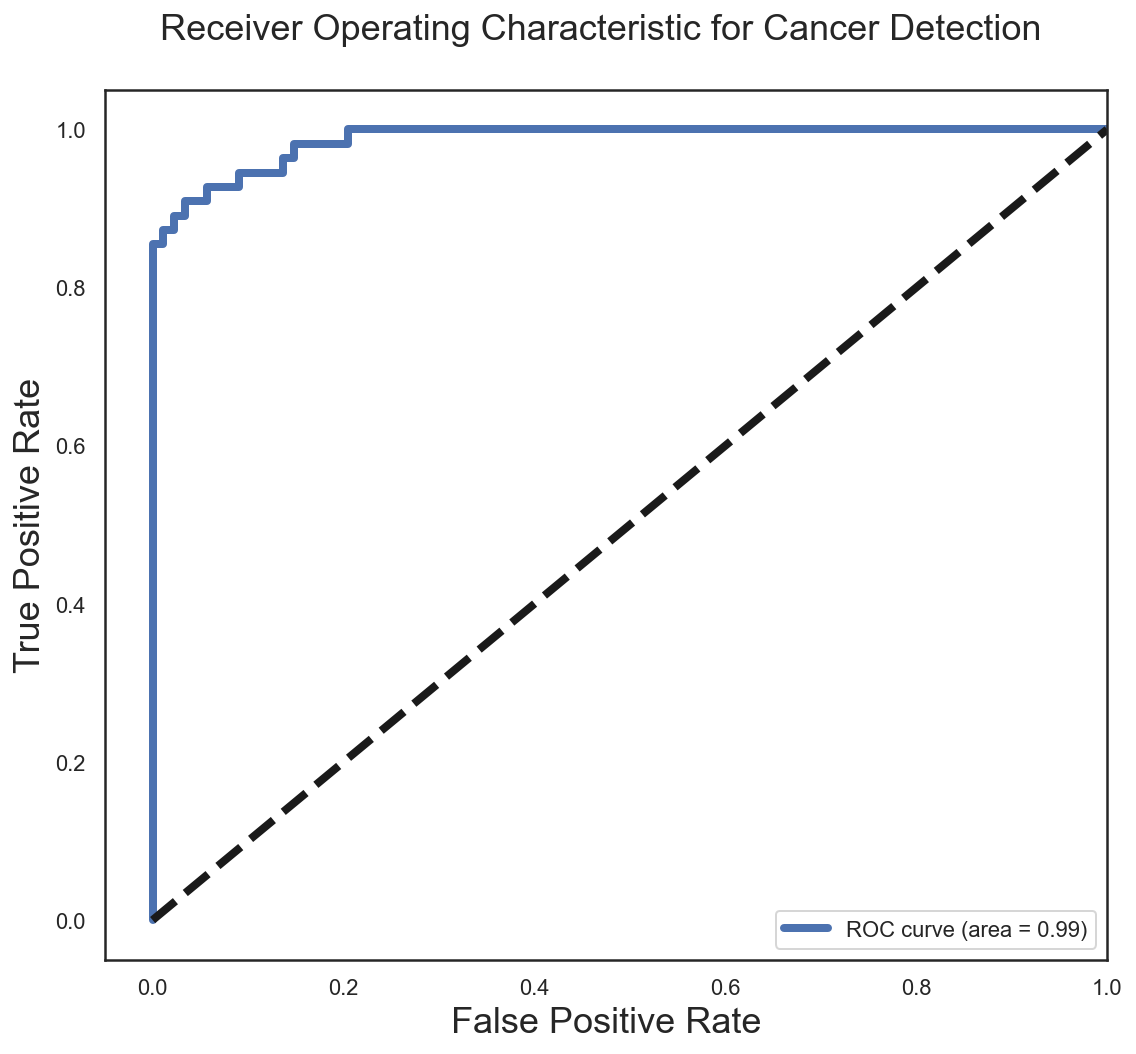

In [31]:
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, Y_pp['class_M_pp'], pos_label='M')
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic for Cancer Detection \n', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



